<a href="https://colab.research.google.com/github/thesalmonification/DSCI400_Revamp/blob/master/ChannelEnergy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [0]:
################################################################################
"""This file is designed to explore basic aspects of 2-norm energy in signals
across all sessions/electrodes. This file first calculates the 2-norm energy of 
every waveform for every session. Then, we plot the 2-norm energy values for every
channel for every emotional category.
"""

#Import necessary packages...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

Add Google Drive

In [2]:
#This file was written on collab, so must import shared drives...
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Grab Label Data Keys in order to make parsing of HDF5 easier

In [0]:
#Import the label (and essential waveform) keys of the HDF5

label_keys = pd.read_csv('/content/drive/Shared drives/DSCI400_Revamp/Label_Data_Keys.csv',header=None)
label_keys = list(label_keys[0])

Create a dictionary of dictionaries to hold 2-norm values of every channel, for every emotion, for every session

In [4]:
#Build DataFrames to hold all 2-norm data...


data_dict = {}
chs = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3','P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6','FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']

for feltEmo_val in range(0,13): # I have 12 different emotional keys, add them to the dict with internal dicts to hold info for every channel...
  data_dict[feltEmo_val] = {}
  for ch in chs:
    data_dict[feltEmo_val][ch] = []

print(data_dict)

{0: {'Fp1': [], 'AF3': [], 'F3': [], 'F7': [], 'FC5': [], 'FC1': [], 'C3': [], 'T7': [], 'CP5': [], 'CP1': [], 'P3': [], 'P7': [], 'PO3': [], 'O1': [], 'Oz': [], 'Pz': [], 'Fp2': [], 'AF4': [], 'Fz': [], 'F4': [], 'F8': [], 'FC6': [], 'FC2': [], 'Cz': [], 'C4': [], 'T8': [], 'CP6': [], 'CP2': [], 'P4': [], 'P8': [], 'PO4': [], 'O2': []}, 1: {'Fp1': [], 'AF3': [], 'F3': [], 'F7': [], 'FC5': [], 'FC1': [], 'C3': [], 'T7': [], 'CP5': [], 'CP1': [], 'P3': [], 'P7': [], 'PO3': [], 'O1': [], 'Oz': [], 'Pz': [], 'Fp2': [], 'AF4': [], 'Fz': [], 'F4': [], 'F8': [], 'FC6': [], 'FC2': [], 'Cz': [], 'C4': [], 'T8': [], 'CP6': [], 'CP2': [], 'P4': [], 'P8': [], 'PO4': [], 'O2': []}, 2: {'Fp1': [], 'AF3': [], 'F3': [], 'F7': [], 'FC5': [], 'FC1': [], 'C3': [], 'T7': [], 'CP5': [], 'CP1': [], 'P3': [], 'P7': [], 'PO3': [], 'O1': [], 'Oz': [], 'Pz': [], 'Fp2': [], 'AF4': [], 'Fz': [], 'F4': [], 'F8': [], 'FC6': [], 'FC2': [], 'Cz': [], 'C4': [], 'T8': [], 'CP6': [], 'CP2': [], 'P4': [], 'P8': [], 'PO4

Calculate 2-norm values for all sessions

In [5]:
#Iterate over all sessions and build corresponding plots...

for key in label_keys:
  session_labels = pd.read_hdf('/content/drive/Shared drives/DSCI400_Revamp/Label_Data.h5',key=key).T #get the emotional lables to determine the feltEmo value...
  feltEmo_val = int(session_labels['feltEmo'])

  #Open the session, calculate the 2-norm and add it to the data_dict
  session_df = pd.read_hdf('/content/drive/Shared drives/DSCI400_Revamp/Waveform_Vocoded_Equalized_Data.h5',key=key[:-7]) #Note, here I use the trimmed waveforms as to make the two-norm calculations more equal across sessions...
  for ch in chs:
    signal_energy = np.linalg.norm(session_df[ch].to_numpy()) #Calculate the 2-norm energy of the signal...
    data_dict[feltEmo_val][ch].append(signal_energy) #Add the signal energy to the data_dict

print(data_dict)


{0: {'Fp1': [0.8191306, 0.7981674, 1.2940301, 1.4675044, 1.332876, 1.0837761, 2.015177, 2.8697798, 1.9507182, 2.8222086, 2.5922077, 2.7939768, 3.5016856, 3.9612281, 3.7049878, 0.9812137, 0.9646268, 2.9044068, 3.257156, 3.3678918, 1.2515512, 1.4489837, 1.6327113, 1.7341313, 2.3241894, 2.5547853, 2.387119, 2.4439414, 2.3761582, 5.783118, 5.708717, 5.7978864, 5.590287, 5.6135387, 5.604274, 5.6768184, 0.06787177, 2.259813, 2.2048538, 2.2586555, 2.2613204, 2.4539971, 2.4934633, 2.5978215, 2.3149586, 2.4375503, 2.574693, 2.8930233, 2.4656327, 2.4418492, 2.0161078, 2.0282238, 1.9938034, 1.9759133, 0.36458403, 0.35289234, 0.28768852, 1.423909, 0.034293335, 3.405552, 1.6311646, 1.4667029, 3.8595722, 3.9360495, 3.824003, 4.010322, 1.7198335, 2.0250177, 2.5824575, 2.4657187, 0.048934307, 1.8444622, 2.4088373, 1.4965703, 1.4561993, 1.4912925, 1.8844807, 1.9289374, 0.11050025, 2.9119444, 3.1625168, 0.15777537, 1.0874588, 2.2494476, 2.0597913, 2.4430346, 0.8159493, 1.3434123, 1.3339151, 0.867505, 0.

Convert the 2-norm values to prep for box-and-whisker display

In [0]:
#Make boxplots of each feltEmo value, with the 32 channels on the x-axis...

#Make dataframes: for for each emotion 0-12
emo0_df = pd.DataFrame(data_dict[0])
emo1_df = pd.DataFrame(data_dict[1])
emo2_df = pd.DataFrame(data_dict[2])
emo3_df = pd.DataFrame(data_dict[3])
emo4_df = pd.DataFrame(data_dict[4])
emo5_df = pd.DataFrame(data_dict[5])
emo6_df = pd.DataFrame(data_dict[6])
emo7_df = pd.DataFrame(data_dict[7])
emo8_df = pd.DataFrame(data_dict[8])
emo9_df = pd.DataFrame(data_dict[9])
emo10_df = pd.DataFrame(data_dict[10])
emo11_df = pd.DataFrame(data_dict[11])
emo12_df = pd.DataFrame(data_dict[12])


#Make box and whisker plots...need them reformatted to lists of lists
data0 = []
data1 = []
data2 = []
data3 = []
data4 = []
data5 = []
data6 = []
data7 = []
data8 = []
data9 = []
data10 = []
data11 = []
data12 = []

for ch in chs:
  data0.append(emo0_df[ch].to_numpy())
  data1.append(emo1_df[ch].to_numpy())
  data2.append(emo2_df[ch].to_numpy())
  data3.append(emo3_df[ch].to_numpy())
  data4.append(emo4_df[ch].to_numpy())
  data5.append(emo5_df[ch].to_numpy())
  data6.append(emo6_df[ch].to_numpy())
  data7.append(emo7_df[ch].to_numpy())
  data8.append(emo8_df[ch].to_numpy())
  data9.append(emo9_df[ch].to_numpy())
  data10.append(emo10_df[ch].to_numpy())
  data11.append(emo11_df[ch].to_numpy())
  data12.append(emo12_df[ch].to_numpy())

Display the box-and-whisker plots

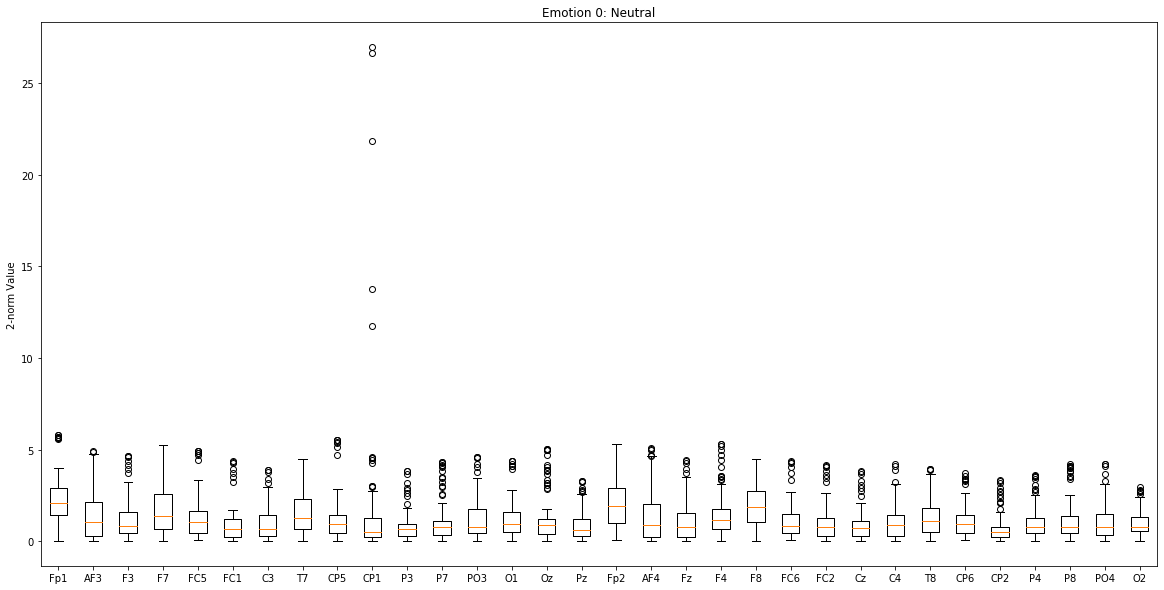

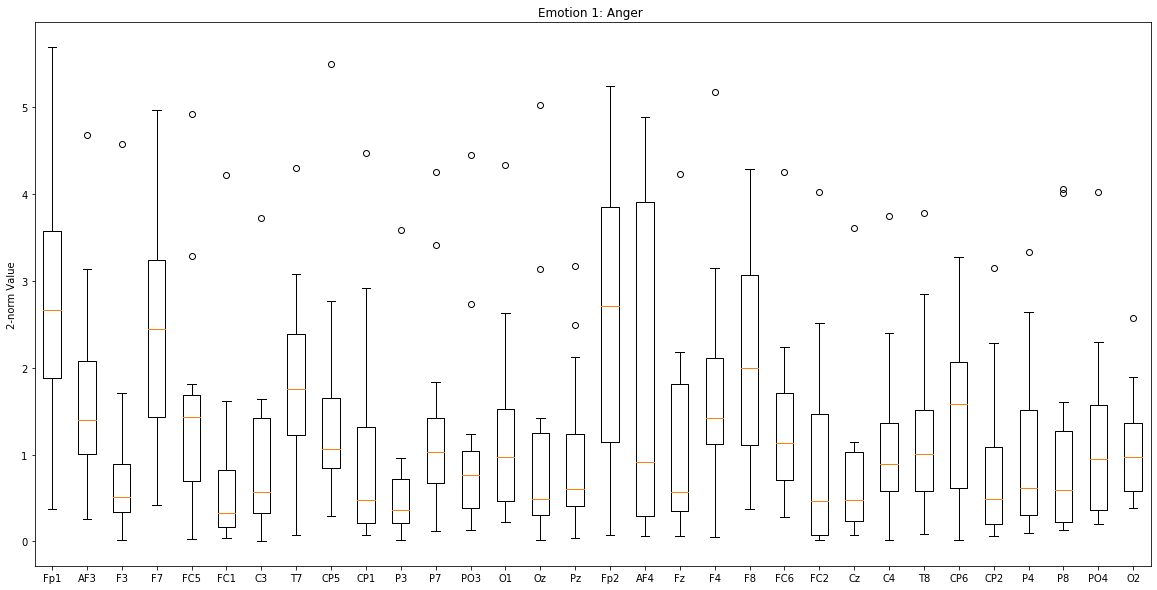

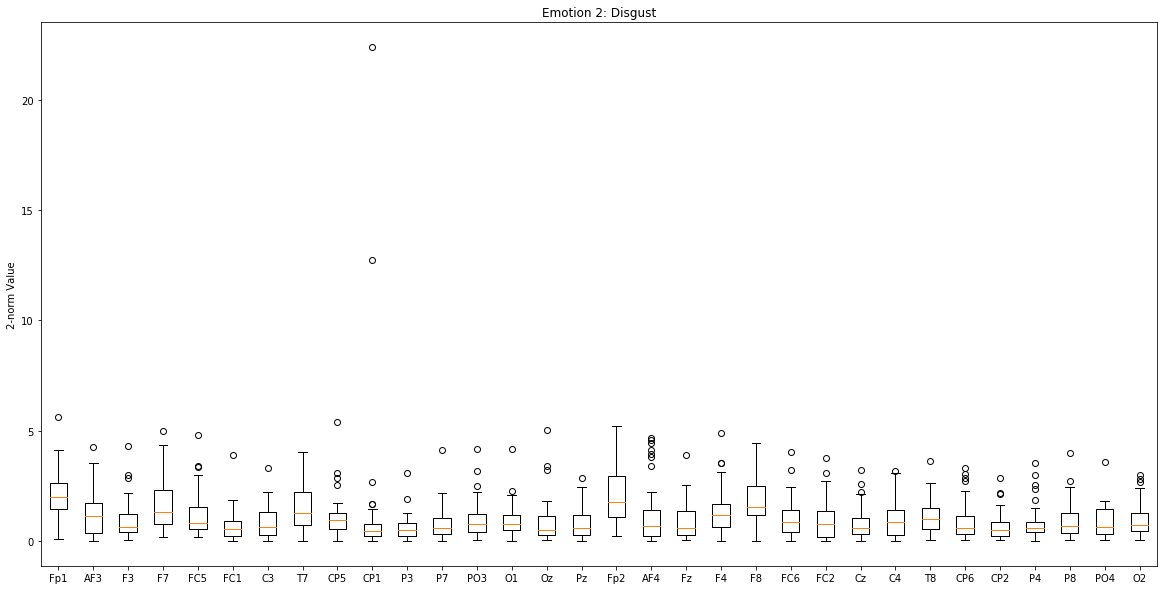

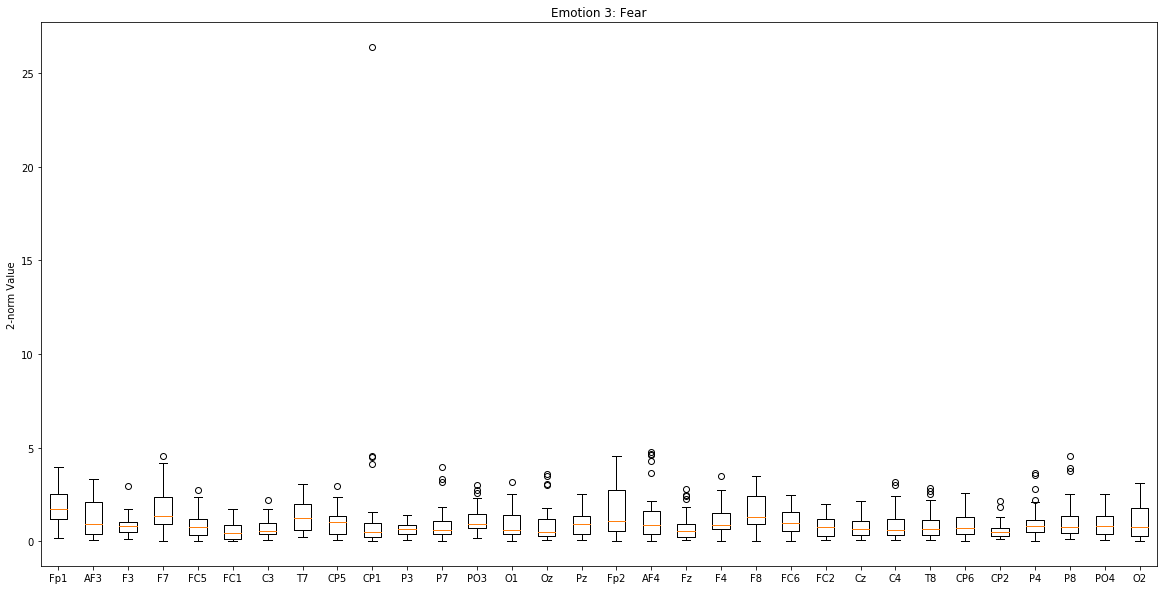

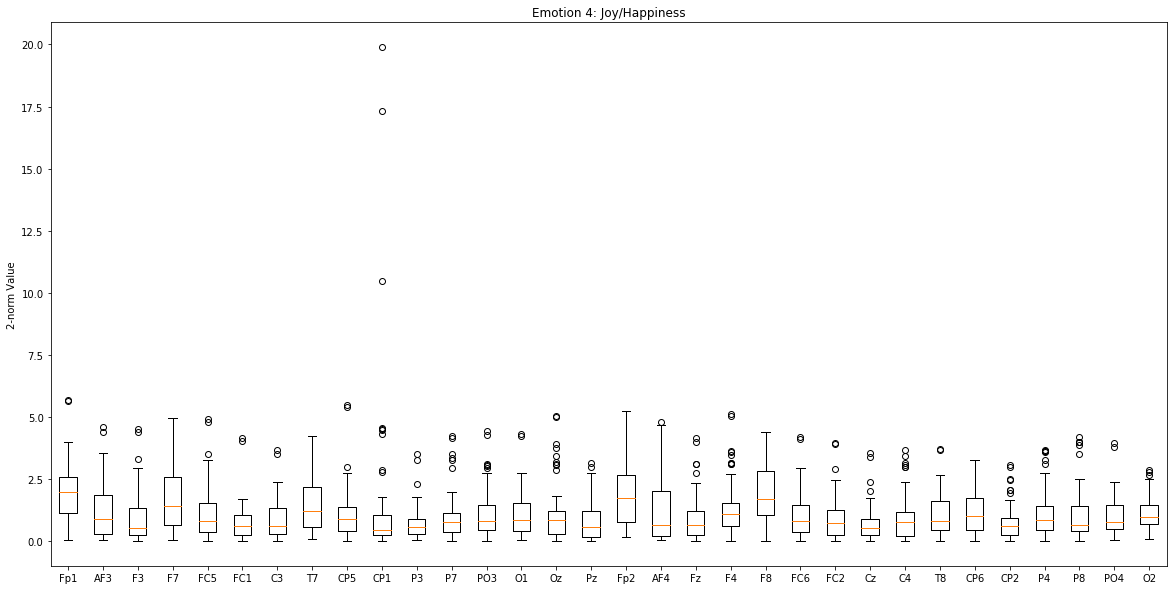

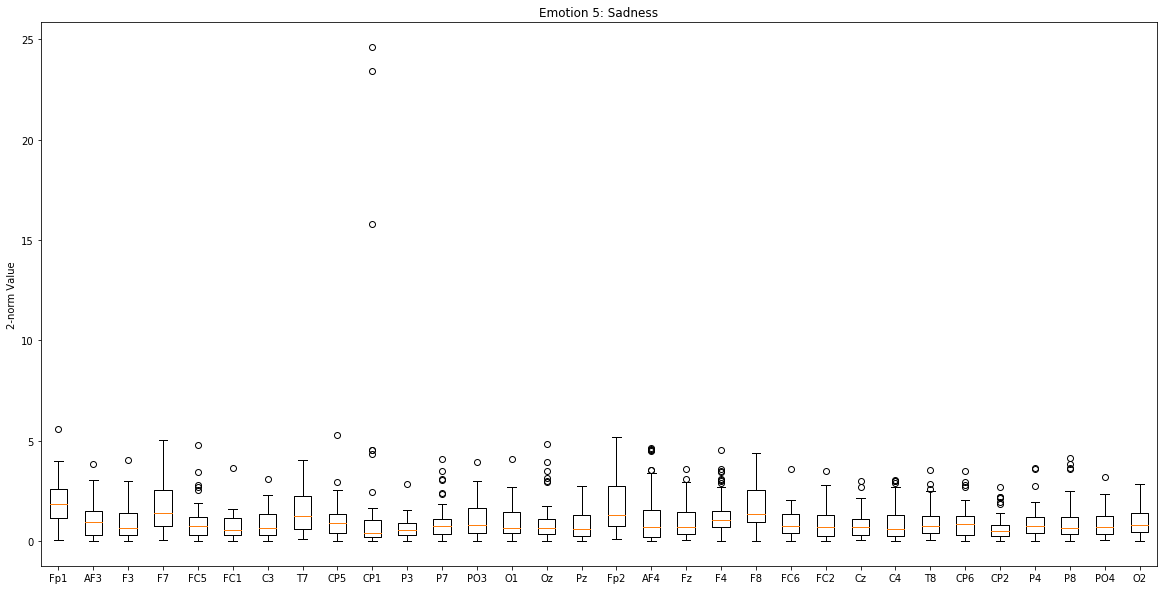

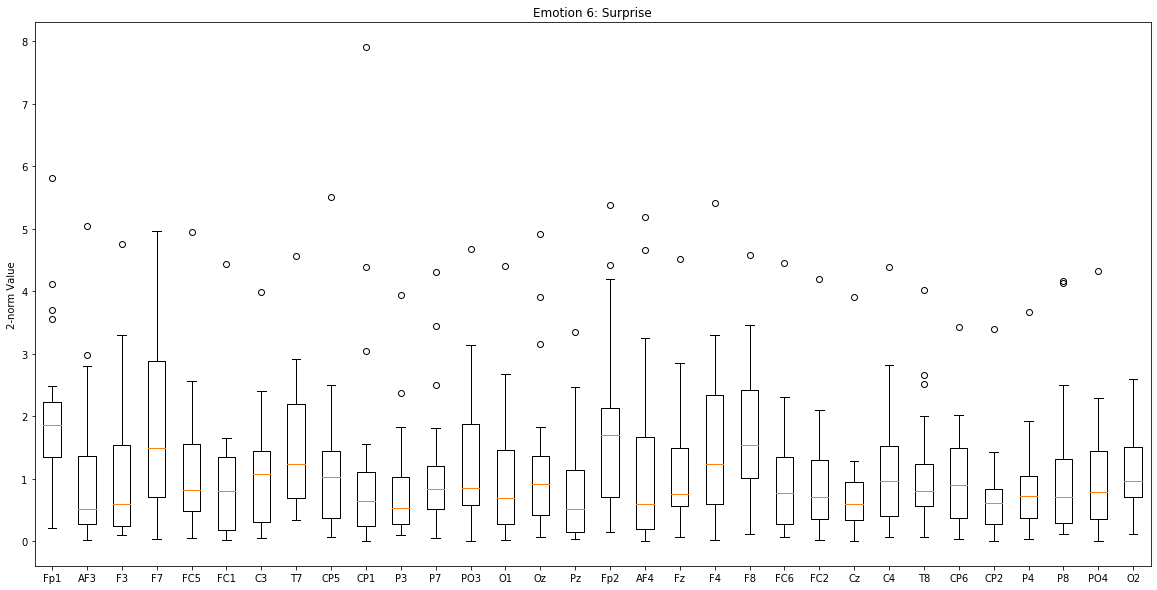

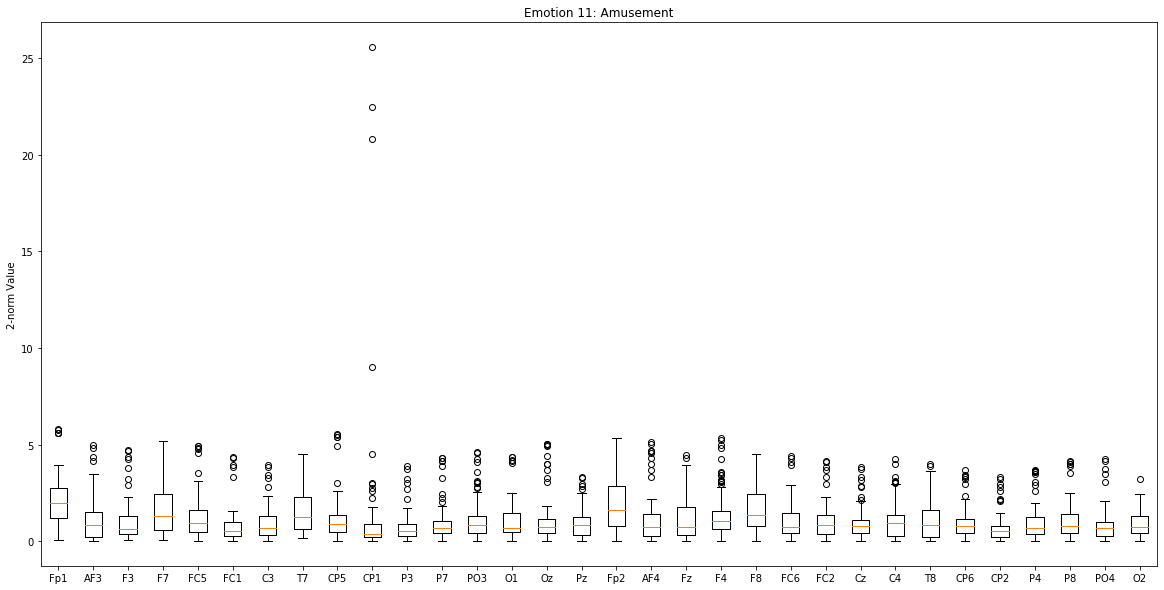

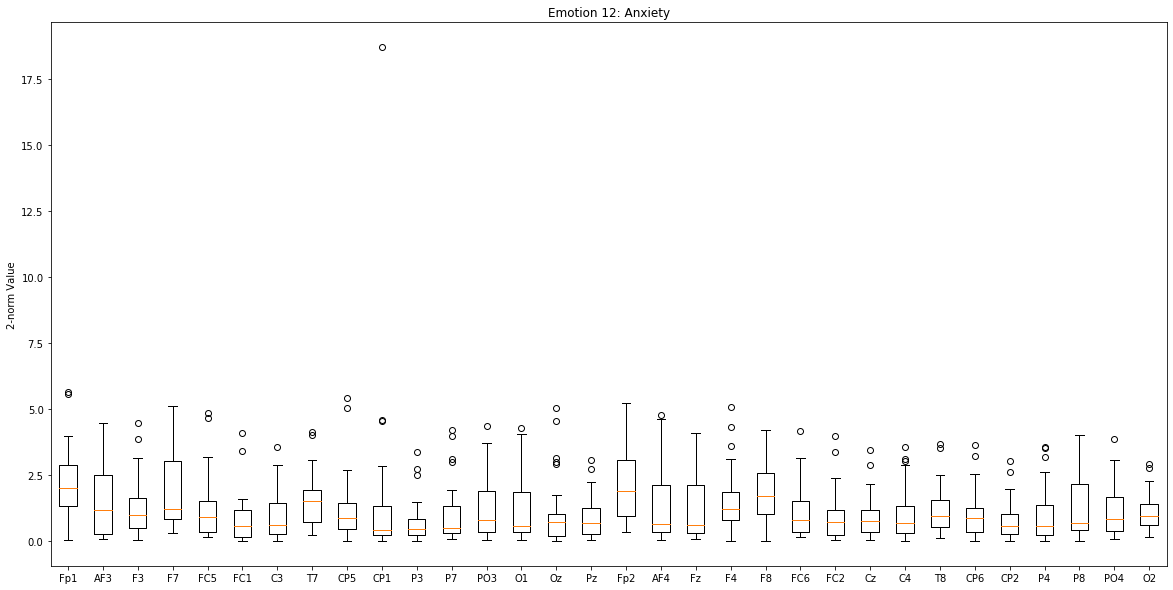

In [8]:
#Make the actual plots and display
fig0, ax0 = plt.subplots(figsize=(20,10))
ax0.set_title('Emotion 0: Neutral')
ax0.boxplot(data0)
ax0.set_xticklabels(chs)
ax0.set_ylabel('2-norm Value')

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('Emotion 1: Anger ')
ax1.boxplot(data1)
ax1.set_xticklabels(chs)
ax1.set_ylabel('2-norm Value')


fig2, ax2 = plt.subplots(figsize=(20,10))
ax2.set_title('Emotion 2: Disgust')
ax2.boxplot(data2)
ax2.set_xticklabels(chs)
ax2.set_ylabel('2-norm Value')


fig3, ax3 = plt.subplots(figsize=(20,10))
ax3.set_title('Emotion 3: Fear')
ax3.boxplot(data3)
ax3.set_xticklabels(chs)
ax3.set_ylabel('2-norm Value')


fig4, ax4 = plt.subplots(figsize=(20,10))
ax4.set_title('Emotion 4: Joy/Happiness')
ax4.boxplot(data4)
ax4.set_xticklabels(chs)
ax4.set_ylabel('2-norm Value')


fig5, ax5 = plt.subplots(figsize=(20,10))
ax5.set_title('Emotion 5: Sadness')
ax5.boxplot(data5)
ax5.set_xticklabels(chs)
ax5.set_ylabel('2-norm Value')


fig6, ax6 = plt.subplots(figsize=(20,10))
ax6.set_title('Emotion 6: Surprise')
ax6.boxplot(data6)
ax6.set_xticklabels(chs)
ax6.set_ylabel('2-norm Value')

#These emotions were not used in this experiment. Their graphs were blank...
"""
fig7, ax7 = plt.subplots(figsize=(20,10))
ax7.set_title('Emotion 7: Scream')
ax7.boxplot(data7)
ax7.set_xticklabels(chs)
ax7.set_ylabel('2-norm Value')


fig8, ax8 = plt.subplots(figsize=(20,10))
ax8.set_title('Emotion 8: Bored')
ax8.boxplot(data8)
ax8.set_xticklabels(chs)
ax8.set_ylabel('2-norm Value')


fig9, ax9 = plt.subplots(figsize=(20,10))
ax9.set_title('Emotion 9: Sleepy')
ax9.boxplot(data9)
ax9.set_xticklabels(chs)
ax9.set_ylabel('2-norm Value')


fig10, ax10 = plt.subplots(figsize=(20,10))
ax10.set_title('Emotion 10: Unknown')
ax10.boxplot(data10)
ax10.set_xticklabels(chs)
ax10.set_ylabel('2-norm Value')

"""

fig11, ax11 = plt.subplots(figsize=(20,10))
ax11.set_title('Emotion 11: Amusement')
ax11.boxplot(data11)
ax11.set_xticklabels(chs)
ax11.set_ylabel('2-norm Value')


fig12, ax12 = plt.subplots(figsize=(20,10))
ax12.set_title('Emotion 12: Anxiety')
ax12.boxplot(data12)
ax12.set_xticklabels(chs)
ax12.set_ylabel('2-norm Value')


plt.show()
